In [2]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *
from ATSolver import ATSolver
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['font.size'] = 18
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
# plt.rcParams['mathtext.fontset'] = 'cm'
%load_ext autoreload
%autoreload 2

# 8/8/23 Demo with Ruilong & Judy

In [22]:
# two light fields
delta_mod = 20 # 20*gamma
theta = 90 # 90 deg polarization (y-polarized)
light_fields = [(10, -1), (10, 1)] # [(Omega(gamma), Detuning(delta_mod))]

AT = ATSolver(light_fields, delta_mod, theta_pol=theta*np.pi/180)

In [10]:
AT.args['b'] = np.array([0, 0, 0]) # zeeman splitting g*mu*[Bx, By, Bz] in gamma
AT.args['vx'] = 2 # velocity along x (m/s)
AT.SolveME_single()
# total fluorescence
print(AT.rho11 + AT.rho22 + AT.rho33)
# Iy (fluorescence emitted along y)
print(AT.rho22 + (1/2)*(AT.rho11 + AT.rho33 - 2*AT.rho13_Re))

0.4917832634866589
1.8438919009087277e-33


In [23]:
bz = np.linspace(-40, 40, 81)
bx = 1 * np.ones_like(bz)
by = 0.1 * np.ones_like(bz)
AT.b_array = np.array([bx, by, bz]).transpose()

In [ ]:
# 2D gradient 
bz = np.linspace(-40, 40, 80)
bx = np.linspace(-10, 10, 20)


In [24]:
vx = 0
result = AT.SolveME_single_b_array(vx)

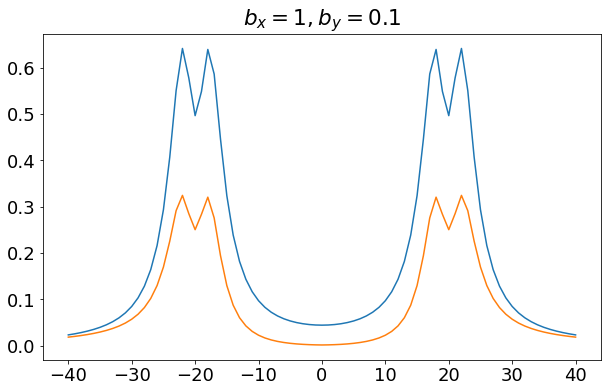

In [29]:
rho_e = result[:,0] + result[:,1] + result[:,2]
Iy = result[:,1] + (1/2)*(result[:,0] + result[:,2] - 2*result[:,3])

plt.title("$b_x = 1, b_y = 0.1$")
plt.plot(AT.b_array[:,2], rho_e)
plt.plot(AT.b_array[:,2], Iy)
plt.show()

# 7/8/23 Plot NoDoppler results

In [4]:
light_fields = [(10, -1), (10, 1)]
theta = 90 # degrees

def H0_4fields(args):
	# Time-independent elements of the Hamiltonian [magnetic-field dependent]
	b_cross_term = (args['b'][0] + 1j * args['b'][1]) / np.sqrt(2)
	H0 = Qobj([[0, 0, 0, 0], \
		[0, args['b'][2], np.conj(b_cross_term) , 0], \
        [0, b_cross_term, 0, np.conj(b_cross_term)], \
        [0, 0, b_cross_term, -args['b'][2]]])
	return H0

# time-dependent coefficient for sigma+ sigma- terms 
def coeff_sigma_terms(t, args):
	a = args['Omegas'] * args['gamma'] * np.exp(1j * t * \
		(args['Deltas'] * args['delta_mod'] * args['gamma'] - args['k'] * args['vx']))
	return -1j * a.sum() * np.sin(args['theta_pol']) / (2 * np.sqrt(6))

# time-dependent coefficient for sigma+ sigma- terms (complex conj)
def coeff_sigma_terms_conj(t, args):
	return np.conj(coeff_sigma_terms(t, args))

# time-dependent coefficient for pi terms
def coeff_pi_terms(t, args):
	a = args['Omegas'] * args['gamma'] * np.exp(1j * t * \
		(args['Deltas'] * args['delta_mod'] * args['gamma'] - args['k'] * args['vx']))
	return a.sum() * np.cos(args['theta_pol']) / (2 * np.sqrt(3))

# time-dependent coefficient for pi terms (complex conj)
def coeff_pi_terms_conj(t, args):
	return np.conj(coeff_pi_terms(t, args))

AT = ATSolver(light_fields=light_fields, delta_mod=20, theta_pol=theta*np.pi/180)
H0 = H0_4fields(AT.args)
H = [H0, [AT.H_cos, coeff_sigma_terms], [AT.H_cos_dag, coeff_sigma_terms_conj], \
[AT.H_sin, coeff_pi_terms], [AT.H_sin_dag, coeff_pi_terms_conj]]

output = mesolve(H, AT.psi0, AT.tlist, c_ops=AT.c_op_list, args=AT.args)

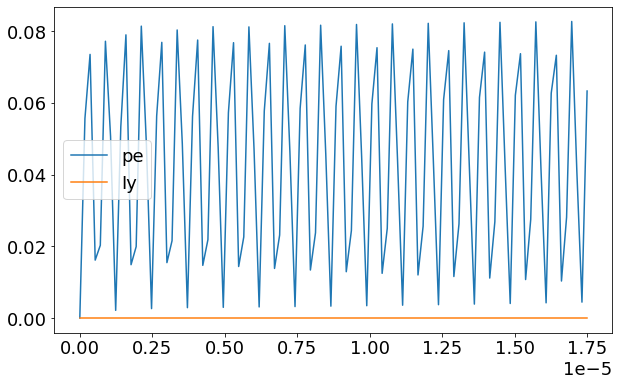

In [13]:
N = len(output.states)
pe = []
Iy = []

for i in range(N):
    rho = output.states[i]
    pe.append(np.real(rho[1,1] + rho[2,2] + rho[3,3]))
    Iy.append(np.real(rho[2,2] + (rho[1,1] + rho[3,3] - rho[1,3] - rho[3,1])/2))

fig, ax = plt.subplots()
plt.plot(AT.tlist, pe, label="pe")
plt.plot(AT.tlist, Iy, label="Iy")
plt.legend()
plt.show()

In [8]:
light_fields = [(10, -1), (10, 1)]
theta = 90 # degrees

AT = ATSolver(light_fields=light_fields, delta_mod=20, theta_pol=theta*np.pi/180)
AT.b_array = np.linspace(0, 75, 151) # bz array test
result = AT.SolveME_single_b_array(0)

# Compute rho_e, Iy (with Hanle effect)
rho_e = result[:, 0] + result[:, 1] + result[:, 2]
Iy = result[:, 1] + (result[:, 0] + result[:, 2] - 2*result[:, 3]) / 2

In [11]:
light_fields = [(10, -1), (10, 1)]
theta = 45 # degrees

AT = ATSolver(light_fields=light_fields, delta_mod=20, theta_pol=theta*np.pi/180)
AT.b_array = np.linspace(0, 75, 151) # bz array test
result = AT.SolveME_single_b_array(0)

# Compute rho_e, Iy (with Hanle effect)
rho_e_45 = result[:, 0] + result[:, 1] + result[:, 2]
Iy_45 = result[:, 1] + (result[:, 0] + result[:, 2] - 2*result[:, 3]) / 2

In [12]:
light_fields = [(10, -1), (10, 1)]
theta = 0 # degrees

AT = ATSolver(light_fields=light_fields, delta_mod=20, theta_pol=theta*np.pi/180)
AT.b_array = np.linspace(0, 75, 151) # bz array test
result = AT.SolveME_single_b_array(0)

# Compute rho_e, Iy (with Hanle effect)
rho_e_0 = result[:, 0] + result[:, 1] + result[:, 2]
Iy_0 = result[:, 1] + (result[:, 0] + result[:, 2] - 2*result[:, 3]) / 2

In [15]:
data = np.array([rho_e, Iy, rho_e_45, Iy_45, rho_e_0, Iy_0]).transpose()

import pandas as pd
df = pd.DataFrame(data, columns=["pe_90", "Iy_90", "pe_45", "Iy_45", "pe_0", "Iy_0"])
df["bz"] = bz
df

,pe_90,Iy_90,pe_45,Iy_45,pe_0,Iy_0,bz
0,0.043626,1.635698e-34,0.043622,0.021811,0.043623,0.043623,0.0
1,0.043708,6.871599e-04,0.043664,0.022158,0.043623,0.043623,0.5
2,0.043950,1.168095e-03,0.043787,0.022401,0.043623,0.043623,1.0
3,0.044359,1.446651e-03,0.043992,0.022540,0.043623,0.043623,1.5
4,0.044940,1.709584e-03,0.044283,0.022670,0.043623,0.043623,2.0
...,...,...,...,...,...,...,...
146,0.003905,3.621355e-03,0.023343,0.023193,0.043623,0.043623,73.0
147,0.003841,3.565483e-03,0.023311,0.023165,0.043623,0.043623,73.5
148,0.003776,3.508232e-03,0.023279,0.023136,0.043623,0.043623,74.0
149,0.003712,3.451060e-03,0.023247,0.023108,0.043623,0.043623,74.5


In [40]:
df.to_csv("NoDoppler_pol_20_bzonly.csv", index=False)

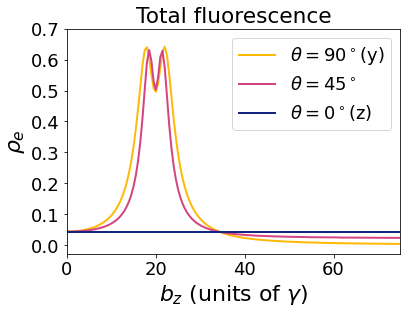

In [45]:
fig, ax = plt.subplots(figsize=(6,4.5))

colors = ["#FFBA08","#d34580", "#132481"]
plt.plot(df["bz"], df["pe_90"], label=r"$\theta = 90^\circ$(y)", color=colors[0], lw=2)
plt.plot(df["bz"], df["pe_45"], label=r"$\theta = 45^\circ$", color=colors[1], lw=2)
plt.plot(df["bz"], df["pe_0"], label=r"$\theta = 0^\circ$(z)", color=colors[2], lw=2)

ax.legend()
ax.set_xlim([0, 75])
plt.yticks(np.linspace(0, 0.7, 8))
ax.set_xlabel("$b_z$ (units of $\gamma$)", fontsize=22)
ax.set_ylabel(r"$\rho_e$", fontsize=22)
fig.tight_layout()
plt.title("Total fluorescence")
plt.savefig("NoDoppler_10_20_pe.pdf")
plt.show()

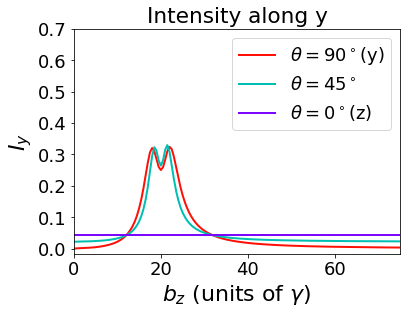

In [46]:
fig, ax = plt.subplots(figsize=(6,4.5))

colors = ["#ff1007","#00BFB2", "#7d06ff"]
plt.plot(df["bz"], df["Iy_90"], label=r"$\theta = 90^\circ$(y)", color=colors[0], lw=2)
plt.plot(df["bz"], df["Iy_45"], label=r"$\theta = 45^\circ$", color=colors[1], lw=2)
plt.plot(df["bz"], df["Iy_0"], label=r"$\theta = 0^\circ$(z)", color=colors[2], lw=2)

ax.legend()
ax.set_xlim([0, 75])
plt.yticks(np.linspace(0, 0.7, 8))
ax.set_xlabel("$b_z$ (units of $\gamma$)", fontsize=22)
ax.set_ylabel(r"$I_y$", fontsize=22)
fig.tight_layout()
plt.title("Intensity along y")
plt.savefig("NoDoppler_10_20_Iy.pdf")
plt.show()

# 4/14/23 Revamp `ATSolver` from older versions
## Test `SolveME_single` function

In [ ]:
light_fields = [(10, -1), (10, 1)]
AT = ATSolver(light_fields=light_fields, delta_mod=20, theta_pol=np.pi/2)
AT.args['b'] = np.array([0, 0, 10]) * AT.args['gamma'] # set b-field
AT.SolveME_single()
print(AT.rho11, AT.rho22, AT.rho33, AT.rho13_Re)

In [ ]:
np.zeros((3,4))

## Test `SolveME_single_b_array` function
If `b_array` is a 1D array -> set`b[self.b_direction]` accordingly

In [ ]:
b_array = np.linspace(0, 60, 61)
len(np.shape(b_array))

In [ ]:
b_array = [1]
len(np.shape(b_array))

In [ ]:
b_array = np.array([
    [0,0,1],
    [0,0,2]
])
np.shape(b_array)[1]

### Test with 1D b_array

In [ ]:
light_fields = [(10, -1), (10, 1)]
AT = ATSolver(light_fields=light_fields, delta_mod=20, theta_pol=np.pi/2)
AT.b_array = np.array([0, 10])
AT.b_direction = 2
results = AT.SolveME_single_b_array(0)
results

In [ ]:
light_fields = [(10, -1), (10, 1)]
AT = ATSolver(light_fields=light_fields, delta_mod=20, theta_pol=np.pi/2)
AT.b_array = np.linspace(0, 30, 31)
AT.b_direction = 2
results = AT.SolveME_single_b_array(0)

In [ ]:
# Calculate excited-state population and intensity along y from results
pe = results[:,0] + results[:,1] + results[:,2]
Iy = results[:,0] + 2 * results[:,1] + results[:,2] - 2 * results[:, 3]
plt.plot(AT.b_array, pe, label="$p_e$")
plt.plot(AT.b_array, Iy, label="$I_y$")
plt.legend()
plt.show()

### Test with 2D b_array (correct format)

In [ ]:
light_fields = [(10, -1), (10, 1)]
AT = ATSolver(light_fields=light_fields, delta_mod=20, theta_pol=np.pi/2)
AT.b_array = np.array([[0,0,0], [0,0,10]])
results = AT.SolveME_single_b_array(0)
results

### Test with 2D b_array (wrong format)

In [ ]:
light_fields = [(10, -1), (10, 1)]
AT = ATSolver(light_fields=light_fields, delta_mod=20, theta_pol=np.pi/2)
AT.b_array = np.array([[0,0], [0,10]])
results = AT.SolveME_single_b_array(0)
results

## Test SolveME_parallel_b_array

In [10]:
from ATSolver import ATSolver
light_fields = [(10, -1), (10, 1)]
AT = ATSolver(light_fields=light_fields, delta_mod=20, theta_pol=np.pi/2)
AT.b_array = np.linspace(0, 30, 31)
AT.b_direction = 2
vx_input = np.array([0,1])
results = AT.SolveME_parallel_b_array(vx_input)

Time elapsed: 13.31 sec


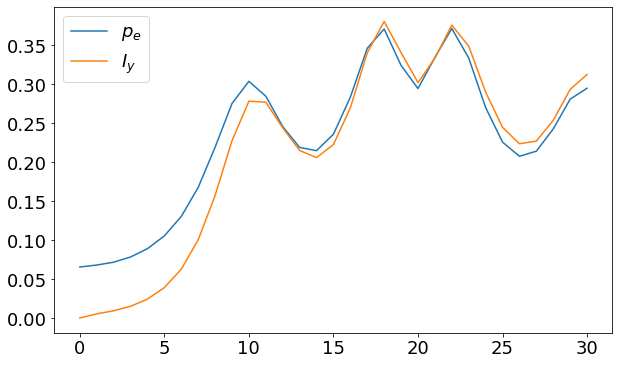

In [11]:
mean_rhos = np.mean(results, axis=0)
# Calculate excited-state population and intensity along y from results
pe = mean_rhos[:,0] + mean_rhos[:,1] + mean_rhos[:,2]
Iy = mean_rhos[:,0] + 2 * mean_rhos[:,1] + mean_rhos[:,2] - 2 * mean_rhos[:, 3]
plt.plot(AT.b_array, pe, label="$p_e$")
plt.plot(AT.b_array, Iy, label="$I_y$")
plt.legend()
plt.show()

In [7]:
np.linspace(0.5, 17, 34)

array([ 0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,
        6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. ,
       11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. , 16.5,
       17. ])